**Models**:
- Binary Classifier (BC)
- Random Forest (RF)
- Neural Network (NN)

# Load Packages

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, losses
from tensorflow.keras import backend as K

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from functools import reduce
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split,RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from datetime import datetime
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import *
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, make_scorer, f1_score, precision_score, recall_score

# Load Datasets and Basic Data Cleaning

## BC & RF: features dataset

In [3]:
df_feature = pd.read_csv('~data/feature_extraction.csv')
df_feature = df_feature.dropna(how='all', subset=df_feature.columns[2:])
df_feature

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,CHL_11x11_median,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3
0,2022-03-04,Anderby,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.174551,163.135918,152.993287,9.480745,126.656470,115.165835,8.739565,184.262455,175.823985,10.048879
1,2022-03-04,Bexhill,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.088710,68.446416,59.178691,9.029485,62.619209,52.394663,7.873103,72.854860,63.530318,10.056020
2,2022-03-04,Birling Gap,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10.805366,93.880434,87.483492,11.032810,70.399693,59.039690,9.145264,91.852595,100.279610,12.380630
3,2022-03-04,"Botany Bay, Broadstairs",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.761849,83.942460,70.130099,8.039195,68.796310,53.251103,5.826829,101.135487,94.071441,8.775965
4,2022-03-04,Brightlingsea,62.57270,42.77478,10.132153,62.57270,42.77478,10.132153,62.57270,42.77478,...,8.110302,68.449360,52.265659,8.602104,62.192470,44.807648,7.444274,76.858376,60.001347,9.831872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28475,2022-10-31,Whitby,96.45255,67.53166,6.800380,96.45255,67.53166,6.800380,96.45255,67.53166,...,5.693440,33.249046,30.364642,5.453727,10.124196,6.075947,5.170083,17.858250,11.138832,6.066630
28476,2022-10-31,Whitley Bay,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.309310,44.649534,46.954763,5.177130,7.078911,4.246786,3.856401,10.785609,6.658894,6.085422
28477,2022-10-31,Widemouth Sand,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.953294,9.439017,6.185049,3.555955,1.677360,0.976173,2.053952,9.585481,5.794549,4.352078
28478,2022-10-31,Wilsthorpe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.383949,140.258110,127.778108,4.487975,58.708913,42.690909,3.901447,175.019072,162.879985,4.956142


## NN: sites_data.csv

In [4]:
sites_data = pd.read_csv("~data/sites_data_11x11.csv")
sites_data

,time,lat,lon,TUR,SPM,CHL,site
0,2022-03-01,55.189352,-1.519043,NaN,NaN,NaN,Newbiggin North
1,2022-03-01,55.189352,-1.517296,NaN,NaN,NaN,Newbiggin North
2,2022-03-01,55.189352,-1.515549,NaN,NaN,NaN,Newbiggin North
3,2022-03-01,55.189352,-1.513802,NaN,NaN,NaN,Newbiggin North
4,2022-03-01,55.189352,-1.512055,NaN,NaN,NaN,Newbiggin North
...,...,...,...,...,...,...,...
12331105,2022-10-31,50.277315,-3.893256,2.006134,1.186131,1.828091,Bigbury-on-Sea South
12331106,2022-10-31,50.277315,-3.891509,0.708182,0.406647,1.046769,Bigbury-on-Sea South
12331107,2022-10-31,50.277315,-3.889762,1.258156,0.729469,1.327342,Bigbury-on-Sea South
12331108,2022-10-31,50.277315,-3.888015,1.037095,0.598882,1.254974,Bigbury-on-Sea South


In [5]:
sites_data.isnull().sum()

time           0
lat            0
lon            0
TUR     10838900
SPM     10838900
CHL     10838900
site           0
dtype: int64

In [6]:
# Fill Null Values with 0, as we cannot have missing values in the tensors for neural network
# Later we will remove time, site pairs where all values are 0

sites_data.fillna(value=-10, inplace=True)

## All: Pollution Data

In [7]:
riskforecasting = pd.read_csv('~data/pollution_risk_forecasting.csv')
riskforecasting["riskLevelLabel"].replace({"normal": 0, "increased": 1}, inplace=True)
riskforecasting

,site,time,warning,riskLevelLabel
0,Ainsdale,2022-04-28,Pollution RIsk Forecasts will start soon,0
1,Ainsdale,2022-04-29,Pollution RIsk Forecasts will start soon,0
2,Ainsdale,2022-04-30,Pollution RIsk Forecasts will start soon,0
3,Ainsdale,2022-05-04,No warnings in place,0
4,Ainsdale,2022-05-05,No warnings in place,0
...,...,...,...,...
63573,Yaverland,2022-09-26,No pollution incidents reported,0
63574,Yaverland,2022-09-27,No pollution incidents reported,0
63575,Yaverland,2022-09-28,No pollution incidents reported,0
63576,Yaverland,2022-09-29,No pollution incidents reported,0


# Data Manipulation and Further Data Cleaning

### BC & RF: Replace NaNs with mean

In [8]:
def fill_na_values_with_mean(row, feature, dimensions):
    if pd.isnull(row).any():
        for dim in dimensions:
            if pd.isna(row[f"{feature}_{dim}x{dim}_median"]):
                available_medians = row[[f"{feature}_{i}x{i}_median" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_median"])]]
                row[f"{feature}_{dim}x{dim}_median"] = available_medians.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_mean"]):
                available_means = row[[f"{feature}_{i}x{i}_mean" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_mean"])]]
                row[f"{feature}_{dim}x{dim}_mean"] = available_means.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_q1"]):
                available_q1s = row[[f"{feature}_{i}x{i}_q1" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_q1"])]]
                row[f"{feature}_{dim}x{dim}_q1"] = available_q1s.mean()

            if pd.isna(row[f"{feature}_{dim}x{dim}_q3"]):
                available_q3s = row[[f"{feature}_{i}x{i}_q3" for i in dimensions if not pd.isna(row[f"{feature}_{i}x{i}_q3"])]]
                row[f"{feature}_{dim}x{dim}_q3"] = available_q3s.mean()
    return row

# apply the function to the DataFrame
dimensions = range(1, 12, 2)
df_feature_mean = df_feature
for feature in ["TUR", "SPM", "CHL"]:
    df_feature_mean = df_feature_mean.apply(fill_na_values_with_mean, axis=1, args=(feature, dimensions))

In [9]:
df_merged_mean = pd.merge(df_feature_mean, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
scaler = MinMaxScaler()
df_merged_mean.iloc[:, 2:-1] = scaler.fit_transform(df_merged_mean.iloc[:, 2:-1])
df_merged_mean

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3,riskLevelLabel
0,2022-03-17,Clacton Beach Martello Tower,0.224870,0.252672,0.046707,0.253950,0.257434,0.071177,0.188546,0.209742,...,0.394330,0.456744,0.158141,0.449706,0.581488,0.277208,0.321900,0.364870,0.106002,0
1,2022-03-17,Frinton,0.231704,0.243840,0.074557,0.231652,0.243809,0.073799,0.232287,0.244198,...,0.351579,0.397965,0.135748,0.356502,0.465034,0.355094,0.316376,0.326689,0.097267,0
2,2022-03-17,Holland,0.178122,0.249220,0.069307,0.178456,0.258058,0.065725,0.151840,0.230222,...,0.294551,0.387215,0.142470,0.350891,0.497459,0.277823,0.246810,0.291411,0.107517,0
3,2022-03-25,Saltburn,0.061897,0.044388,0.068131,0.085416,0.066410,0.069588,0.041808,0.029489,...,0.082683,0.065988,0.132707,0.031685,0.021764,0.319858,0.091519,0.067109,0.097333,0
4,2022-04-28,Anderby,0.210602,0.167115,0.065239,0.221604,0.172217,0.069951,0.186620,0.144500,...,0.275767,0.224840,0.140944,0.309155,0.257826,0.363345,0.232618,0.181993,0.095834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,2022-09-30,"West Beach, Whitstable",0.154823,0.116806,0.068746,0.154766,0.116769,0.067983,0.155464,0.117224,...,0.171163,0.135968,0.146271,0.186162,0.149017,0.371688,0.158725,0.117910,0.099607,0
17758,2022-09-30,West Mersea,0.093376,0.065217,0.066742,0.093314,0.065177,0.065977,0.094064,0.065659,...,0.240233,0.198663,0.134884,0.201130,0.155602,0.365917,0.232726,0.177083,0.087625,0
17759,2022-09-30,West Runton,0.131864,0.114391,0.084333,0.131805,0.114354,0.083583,0.132523,0.114810,...,0.088436,0.079625,0.109713,0.055463,0.041661,0.255517,0.084865,0.068178,0.082707,0
17760,2022-09-30,"Westbrook Bay, Margate",0.125558,0.095832,0.137330,0.125499,0.095795,0.136623,0.126222,0.096260,...,0.143712,0.111035,0.129908,0.157814,0.115645,0.348194,0.121718,0.090408,0.084672,0


### BC & RF: Replace NaNs with -10

In [10]:
df_feature_neg = df_feature
df_feature_neg.fillna(value=-10, inplace=True)

In [11]:
df_merged_neg = pd.merge(df_feature_neg, riskforecasting[['site', 'time', 'riskLevelLabel']], on=['site', 'time'])
df_merged_neg.iloc[:, 2:-1] = scaler.fit_transform(df_merged_neg.iloc[:, 2:-1])
df_merged_neg

,time,site,TUR_1x1_median,SPM_1x1_median,CHL_1x1_median,TUR_1x1_mean,SPM_1x1_mean,CHL_1x1_mean,TUR_1x1_q1,SPM_1x1_q1,...,TUR_11x11_mean,SPM_11x11_mean,CHL_11x11_mean,TUR_11x11_q1,SPM_11x11_q1,CHL_11x11_q1,TUR_11x11_q3,SPM_11x11_q3,CHL_11x11_q3,riskLevelLabel
0,2022-03-17,Clacton Beach Martello Tower,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.394330,0.456744,0.158141,0.449706,0.581488,0.277208,0.321900,0.364870,0.106002,0
1,2022-03-17,Frinton,0.246901,0.258905,0.146798,0.246901,0.258905,0.146798,0.246901,0.258905,...,0.351579,0.397965,0.135748,0.356502,0.465034,0.355094,0.316376,0.326689,0.097267,0
2,2022-03-17,Holland,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.294551,0.387215,0.142470,0.350891,0.497459,0.277823,0.246810,0.291411,0.107517,0
3,2022-03-25,Saltburn,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.082683,0.065988,0.132707,0.031685,0.021764,0.319858,0.091519,0.067109,0.097333,0
4,2022-04-28,Anderby,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.275767,0.224840,0.140944,0.309155,0.257826,0.363345,0.232618,0.181993,0.095834,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17757,2022-09-30,"West Beach, Whitstable",0.171541,0.134401,0.141441,0.171541,0.134401,0.141441,0.171541,0.134401,...,0.171163,0.135968,0.146271,0.186162,0.149017,0.371688,0.158725,0.117910,0.099607,0
17758,2022-09-30,West Mersea,0.111309,0.083839,0.139593,0.111309,0.083839,0.139593,0.111309,0.083839,...,0.240233,0.198663,0.134884,0.201130,0.155602,0.365917,0.232726,0.177083,0.087625,0
17759,2022-09-30,West Runton,0.149037,0.132034,0.155812,0.149037,0.132034,0.155812,0.149037,0.132034,...,0.088436,0.079625,0.109713,0.055463,0.041661,0.255517,0.084865,0.068178,0.082707,0
17760,2022-09-30,"Westbrook Bay, Margate",0.142855,0.113845,0.204671,0.142855,0.113845,0.204671,0.142855,0.113845,...,0.143712,0.111035,0.129908,0.157814,0.115645,0.348194,0.121718,0.090408,0.084672,0


## NN: Combine Datasets to Create Input Dataset
For every site (430) and time (237), create a 11 x 11 x 3 tensor, each corresponding to one risk level label 

In [12]:
%%time
def chl_to_array(chl_values):
    # Not 100% sure if this reshapes according to lat/lon (though it does not matter if we perform the same operation every time?)
    return np.array(chl_values).reshape(11, 11)

def get_features_data(sites_data, features_list):
    '''
    input: 
        - sites_data (pd.DataFrame):
            - dataframe where each row contains feature values for a time, site and coordinate
        - features_list (list):
            - list of strings of features to use
            
    output:
        - features data (pd.DataFrame)
            - row: data for every time and site pair
            - column: features
            - entries: np.array of shape 11x11
    '''
    dfs = []
    for feature in features_list:
        df = pd.DataFrame(sites_data.groupby(['time', 'site'])[feature].apply(chl_to_array))
        dfs.append(df)
    input_data = reduce(lambda  left,right: pd.merge(left,right,on=['time', 'site'],how='outer'), dfs)
    
    return input_data

features_df = get_features_data(sites_data, ['TUR', 'SPM', 'CHL'])
features_df

CPU times: user 6.2 s, sys: 477 ms, total: 6.67 s
Wall time: 6.85 s


TUR   
time       site                                                                        
2022-03-01 Ainsdale                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  \
           Allonby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Allonby South           [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Amble Links             [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Anderby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
...                                                                              ...   
2022-10-31 Withernsea              [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Wolvercote Mill Stream  [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Woolacombe Village      [[5.9864016, 25.982555, -10.0, -10.0, -10.0, -...   
           Worthing                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Yaverland               [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   

                                                                                 SPM   
time       site                                                                        
2022-03-01 Ainsdale                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  \
           Allonby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Allonby South           [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Amble Links             [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Anderby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
...                                                                              ...   
2022-10-31 Withernsea              [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Wolvercote Mill Stream  [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Woolacombe Village      [[3.564524, 16.43204, -10.0, -10.0, -10.0, -10...   
           Worthing                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   
           Yaverland               [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...   

                                                                                 CHL  
time       site                                                                       
2022-03-01 Ainsdale                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Allonby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Allonby South           [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Amble Links             [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Anderby                 [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
...                                                                              ...  
2022-10-31 Withernsea              [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Wolvercote Mill Stream  [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Woolacombe Village      [[6.564089, 6.803925, -10.0, -10.0, -10.0, -10...  
           Worthing                [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  
           Yaverland               [[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...  

[101910 rows x 3 columns]

In [13]:
# Merging datasets. Merge on riskforecasting (only add CHL values if we have riskLevellabel)
input_data = features_df.merge(riskforecasting, how='right', left_on=['time', 'site'], right_on=['time', 'site'])

In [14]:
# Missing data check. 
# Data missing for 07-23 and 07-25 for all sites - No satellite data

input_data[input_data['CHL'].isnull()]['time'].value_counts()

time
2022-07-23    421
2022-07-25    421
2022-04-06      1
Name: count, dtype: int64

In [15]:
# Other missing values to look into - why do we have risk level labels but not satellite data when merging? Naming issue?

input_data[(input_data['CHL'].isnull()) & (input_data['time'] != '2022-07-23') & (input_data['time'] != '2022-07-25')]

,time,site,TUR,SPM,CHL,warning,riskLevelLabel
53163,2022-04-06,Summerleaze,NaN,NaN,NaN,Risk of reduced water quality due to sewage,1


In [16]:
# Drop NA values for now as there are not that many of them
input_data.dropna(inplace=True)
input_data.shape

(62735, 7)

In [17]:
# Remove rows where everything is 0 (i.e. all missing values)
def has_nonzero(arr):
    return np.any(arr != -10)

input_data = input_data[input_data['CHL'].apply(has_nonzero)]
input_data

,time,site,TUR,SPM,CHL,warning,riskLevelLabel
1,2022-04-29,Ainsdale,"[[3.0191753, 4.718409, 18.93536, 31.146648, 17...","[[1.7733235, 2.7514145, 11.544017, 19.844542, ...","[[3.7512763, 5.389326, 19.847187, 21.874485, 5...",Pollution RIsk Forecasts will start soon,0
3,2022-05-04,Ainsdale,"[[6.075095, 8.419083, 17.229292, 32.485336, 56...","[[3.7166793, 5.1792426, 10.841286, 22.20052, 5...","[[7.8970146, 8.904125, 19.88592, 23.188456, 5....",No warnings in place,0
6,2022-05-07,Ainsdale,"[[7.0757475, 8.779541, 17.503372, 31.796015, 8...","[[4.3843403, 5.4292417, 11.049892, 21.979761, ...","[[7.3157673, 8.303483, 17.746412, 20.563904, 4...",No warnings in place,0
11,2022-05-12,Ainsdale,"[[11.064278, 13.916054, 24.395746, 46.244003, ...","[[6.9718647, 8.925689, 15.609535, 33.33457, 68...","[[8.789717, 9.66038, 23.01165, 27.012566, 5.88...",No warnings in place,0
13,2022-05-14,Ainsdale,"[[13.135989, 17.599348, 28.951145, 57.160267, ...","[[8.290485, 11.462988, 18.59951, 41.832813, 51...","[[9.688214, 10.983141, 27.479614, 32.686024, 6...",No warnings in place,0
...,...,...,...,...,...,...,...
63555,2022-09-08,Yaverland,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",No pollution incidents reported,0
63560,2022-09-13,Yaverland,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",No pollution incidents reported,0
63565,2022-09-18,Yaverland,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",No pollution incidents reported,0
63570,2022-09-23,Yaverland,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",No pollution incidents reported,0


# Train-Test Split
- Pick time-site pairs to use as train data and test data
- Potential for implementing cross validation

In [18]:
time_site_pairs = input_data[['time', 'site']]

# 80/20 split
time_site_pairs_test = time_site_pairs.sample(frac=.2, random_state=42)
time_site_pairs_test

,time,site
53796,2022-05-28,Tankerton
38563,2022-06-21,Porthluney
29452,2022-04-28,Margate The Bay
44371,2022-08-27,Scarborough North Bay
18572,2022-09-29,Fleetwood
...,...,...
4681,2022-09-28,Bournemouth Alum Chine
417,2022-08-25,Amble Links
12837,2022-09-26,Crackington Haven
49602,2022-07-03,Slapton Sands Torcross


In [19]:
time_site_pairs_train = time_site_pairs[~time_site_pairs.isin(time_site_pairs_test)].dropna()
time_site_pairs_train

,time,site
3,2022-05-04,Ainsdale
6,2022-05-07,Ainsdale
13,2022-05-14,Ainsdale
21,2022-05-22,Ainsdale
23,2022-05-24,Ainsdale
...,...,...
63532,2022-08-14,Yaverland
63537,2022-08-19,Yaverland
63546,2022-08-29,Yaverland
63565,2022-09-18,Yaverland


# Train & Test Models 
- Train on training time-site pairs
- Test on testing time-site pairs

## Baseline

In [20]:
train_data, test_data = train_test_split(df_merged_mean, test_size=0.2)
label_ratio_train = train_data['riskLevelLabel'].value_counts(normalize=True).to_dict()
num_test_samples = len(test_data)
random_predictions_test = np.random.choice(list(label_ratio_train.keys()), num_test_samples, p=list(label_ratio_train.values()))

# Calculate the accuracy of the random coin flip baseline for the test set
accuracy_test = np.mean(random_predictions_test == test_data['riskLevelLabel'])
print(f'Accuracy of baseline on test set: {accuracy_test:.2%}')

# Calculate Precision, Recall, F1-score
precision_test = precision_score(test_data['riskLevelLabel'], random_predictions_test)#, average='weighted')
recall_test = recall_score(test_data['riskLevelLabel'], random_predictions_test)#, average='weighted')
f1_test = f1_score(test_data['riskLevelLabel'], random_predictions_test)#, average='weighted')

print(f'Precision of baseline on test set: {precision_test:.2%}')
print(f'Recall of baseline on test set: {recall_test:.2%}')
print(f'F1-score of baseline on test set: {f1_test:.2%}')

# Calculate AUC
# This only works if 'riskLevelLabel' is binary.
if len(label_ratio_train.keys()) == 2:
    lb = LabelBinarizer()
    test_data_bin = lb.fit_transform(test_data['riskLevelLabel'])
    random_predictions_test_bin = lb.transform(random_predictions_test)
    auc_test = roc_auc_score(test_data_bin, random_predictions_test_bin)
    print(f'AUC of baseline on test set: {auc_test:.2%}')
    
print("Confusion matrix:\n", confusion_matrix(test_data['riskLevelLabel'], random_predictions_test))

Accuracy of baseline on test set: 95.75%
Precision of baseline on test set: 4.00%
Recall of baseline on test set: 3.66%
F1-score of baseline on test set: 3.82%
AUC of baseline on test set: 50.79%
Confusion matrix:
 [[3399   72]
 [  79    3]]


In [21]:
results_df_baseline = pd.DataFrame([['Baseline', 'Baseline', auc_test, precision_test, recall_test, f1_test, accuracy_test]], columns=['Model', 'Sub-Model', 'AUC','Precision','Recall','f1','acc'])
results_df_baseline

,Model,Sub-Model,AUC,Precision,Recall,f1,acc
0,Baseline,Baseline,0.507921,0.04,0.036585,0.038217,0.957501


## BC

In [22]:
# Train-test split
df_train = df_merged_mean.merge(time_site_pairs_train, on=['time', 'site'], how='inner')
df_test = df_merged_mean.merge(time_site_pairs_test, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (14210, 72)
Training y Shape: (14210,)
Testing X Shape: (3552, 72)
Testing y Shape: (3552,)


In [23]:
# feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# variable selection using LASSO
logreg = LogisticRegression(penalty='l1', solver='liblinear')
logreg.fit(X_train_scaled, y_train)
model = SelectFromModel(logreg, prefit=True)
X_train_selected = model.transform(X_train_scaled)
X_test_selected = model.transform(X_test_scaled)

logreg_selected = LogisticRegression(max_iter=10000)
logreg_selected.fit(X_train_selected, y_train)
y_pred = logreg_selected.predict(X_test_selected)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9786036036036037
Confusion matrix:
 [[3475    4]
 [  72    1]]
Classification report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      3479
           1       0.20      0.01      0.03        73

    accuracy                           0.98      3552
   macro avg       0.59      0.51      0.51      3552
weighted avg       0.96      0.98      0.97      3552



In [24]:
def lg_model(x,y):
    lg_model = LogisticRegression(
        random_state = 100, #specify the random_state 
        solver = 'saga',
        n_jobs = -1 ,#use all cpu cores
        max_iter = 10000 #give more iteration for model to converge 
    )

    params = {'penalty': ['l1', 'l2'],# penalty term
              'C': (0.1, 1,10)} #λ 

    lg = GridSearchCV(lg_model, params, cv=5,scoring=make_scorer(f1_score, average='macro'))
    lg.fit(x, y)
    print(lg.best_score_)
    print('Best_parameters:',lg.best_params_)
    return lg.best_estimator_

In [25]:
%%time
base_lg = lg_model(X_train,y_train)

0.5081584022938749
Best_parameters: {'C': 10, 'penalty': 'l1'}
CPU times: user 45 s, sys: 30.5 s, total: 1min 15s
Wall time: 2min 44s


#### ROC

In [26]:
def draw_roc(model,X_test,y_test):
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Curve')
    plt.legend(loc="lower right")
    plt.show()

In [27]:
#scaling - based on training data
mean_train = X_train.mean() #compute the mean of training set
train_std = X_train.std() #compute the std of training set
scaled_X_train = (X_train-mean_train)/train_std
scaled_X_test = (X_test-mean_train)/train_std # to avoid bias, use the mean and std from training dataset and apply it on the testing dataset.

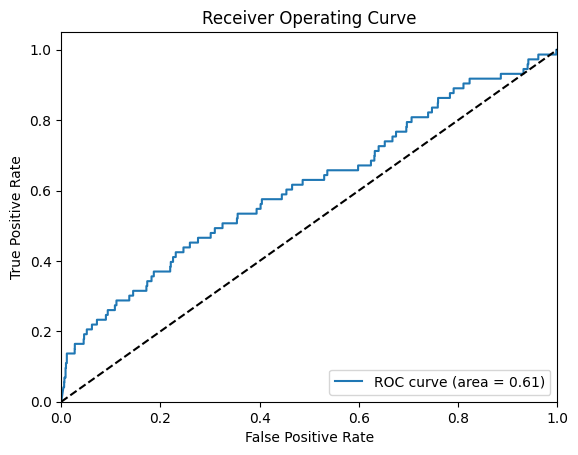

In [28]:
draw_roc(base_lg, scaled_X_test, y_test)

In [29]:
def training_cross_validation_score(model,x,y):
    accuray_scores = cross_val_score(model,x, y, scoring='accuracy', cv=5, n_jobs=-1)# evaluate the model through 5 fold cross-validation
    auc_scores = cross_val_score(model,x, y, scoring='roc_auc', cv=5, n_jobs=-1)# evaluate the model through 5 fold cross-validation
    f1_scores = cross_val_score(model,x, y, scoring='f1', cv=5, n_jobs=-1)# evaluate the model through 5 fold cross-validation
    print(str(model),'\naccuracy:',accuray_scores, '\naverage accuray:',accuray_scores.mean())
    print('\nauc score:', auc_scores,'\naverage auc score:',auc_scores.mean())
    print('\nf1 score:',f1_scores,'\naverage f1 score:',f1_scores.mean())

In [30]:
%%time
training_cross_validation_score(base_lg, X_train,y_train)

LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=100, solver='saga') 
accuracy: [0.96340605 0.97783251 0.97783251 0.97783251 0.97536946] 
average accuray: 0.9744546094299789

auc score: [0.5262764  0.59205378 0.50785654 0.67492018 0.69485998] 
average auc score: 0.5991933754565224

f1 score: [0.         0.         0.         0.         0.14634146] 
average f1 score: 0.029268292682926828
CPU times: user 215 ms, sys: 152 ms, total: 366 ms
Wall time: 1min 25s


In [31]:
def test_evaluation(model,x,y):
    y_pred = model.predict(x)
    print(str(model),"\nOn test data, f1 score: %.2f "%f1_score(y, y_pred))
    print("On test data, Precision: %.2f" %precision_score(y, y_pred))
    print("Recall: %.2f" %recall_score(y, y_pred))
    acc = accuracy_score(y, y_pred)
    print("Accuracy: {:.2f} %".format(acc*100))
    ConfusionMatrixDisplay.from_estimator(model, x, y)

LogisticRegression(C=10, max_iter=10000, n_jobs=-1, penalty='l1',
                   random_state=100, solver='saga') 
On test data, f1 score: 0.07 
On test data, Precision: 0.04
Recall: 0.37
Accuracy: 79.73 %


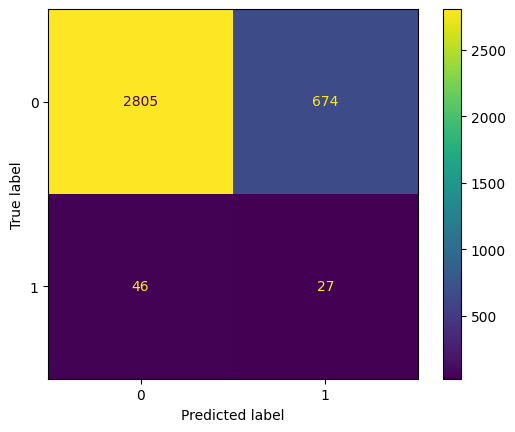

In [32]:
test_evaluation(base_lg, scaled_X_test, y_test)

## RF

### df_merged_mean

In [33]:
# Train-test split
df_train = df_merged_mean.merge(time_site_pairs_train, on=['time', 'site'], how='inner')
df_test = df_merged_mean.merge(time_site_pairs_test, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_test = df_test


print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (14210, 72)
Training y Shape: (14210,)
Testing X Shape: (3552, 72)
Testing y Shape: (3552,)


In [34]:
def rf_result(X_train, y_train, X_test, y_test):
    # fit a random forest to the data
    rf = RandomForestClassifier()
    rf.fit(X_train, y_train)

    # make predictions
    y_pred = rf.predict(X_test)
    y_pred_proba = rf.predict_proba(X_test)[:, 1]
    
    accuracy = np.mean(y_pred == y_test)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)

    return {'Classifier': rf,
            'Precision': precision, 
            'Recall': recall, 
            'f1': f1, 
            'acc': accuracy,
            'AUC': auc}



In [35]:
res = rf_result(X_train, y_train, X_test, y_test)
res['Model'] = 'Random Forest'
res['Sub-Model'] = 'Fill NaN with mean df'
results_df_rf = pd.DataFrame([res])

#### Importance of Feature Aggregation

In [36]:
rf = res['Classifier']

In [37]:
importance_dict = dict(zip(df_train.columns, rf.feature_importances_))

features = ['11x11', '9x9', '7x7', '5x5', '3x3', '1x1', 'TUR', 'SPM', 'CHL']

data = []
for s in features:
    sum_importance = np.sum([importance for feature, importance in importance_dict.items() if s in feature])
    data.append([s, sum_importance])

# Create a DataFrame with the calculated data
df_importances = pd.DataFrame(data, columns=['Feature', 'Sum of Importances'])

def highlight_max(s):
    if len(s) > 3:
        return ['background-color: #DEB887' if v in list(s[np.argsort(s)[-3:]]) else '' for v in s]
    else:
        return ['background-color: #8FBC8F' if v == s.max() else '' for v in s]

df_importances[:6].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
0,11x11,0.161891
1,9x9,0.158937
2,7x7,0.170751
3,5x5,0.173697
4,3x3,0.181054
5,1x1,0.315562


In [38]:
df_importances[-3:].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
6,TUR,0.324353
7,SPM,0.327286
8,CHL,0.348361


#### PCA

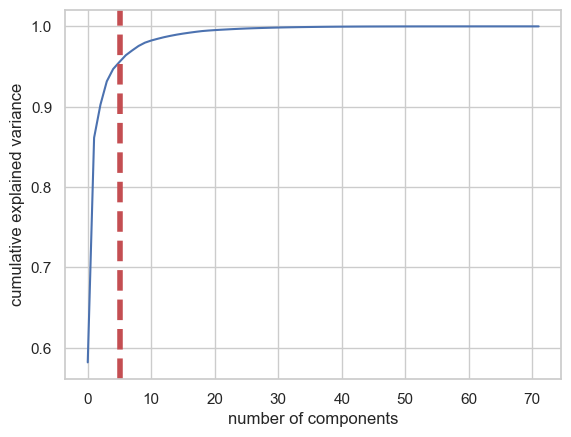

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.581737,0.581737
1,0.861347,0.279610
2,0.902544,0.041197
3,0.931580,0.029037
4,0.946923,0.015343
5,0.955752,0.008829
6,0.964141,0.008389
7,0.970063,0.005922
8,0.975594,0.005531
9,0.979702,0.004108


In [39]:
pca_test = PCA(n_components=72)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [40]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [41]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=df_train.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
TUR_1x1_median,0.108777,0.082587,0.138580,-0.018755,0.300379,0.048952,-0.135270,-0.058092,0.016175,0.059529
SPM_1x1_median,0.091532,0.082279,0.141263,-0.017393,0.268743,0.035345,-0.120745,-0.061694,0.005843,0.075658
CHL_1x1_median,0.043538,-0.058600,0.011596,0.101147,0.008430,0.255981,0.065147,0.056278,0.385885,-0.056257
TUR_1x1_mean,0.114490,0.093818,0.202263,-0.021083,0.248026,0.009688,-0.029630,0.005443,-0.008482,-0.058644
SPM_1x1_mean,0.098357,0.094816,0.206503,-0.021556,0.215910,-0.003372,-0.008934,0.002338,-0.018850,-0.048417
...,...,...,...,...,...,...,...,...,...,...
SPM_11x11_q1,0.125820,0.087741,-0.242522,0.032158,0.099792,-0.079972,0.131339,0.011074,0.027192,0.103074
CHL_11x11_q1,0.221277,-0.254188,-0.054139,-0.303968,0.015443,0.033588,0.164265,-0.383020,0.015902,-0.156595
TUR_11x11_q3,0.140474,0.093514,-0.114703,0.010428,0.008312,0.052687,-0.040059,0.098887,-0.062492,-0.147056
SPM_11x11_q3,0.114165,0.090511,-0.102007,0.016773,0.005909,0.039564,-0.040424,0.091083,-0.062298,-0.113665


In [42]:
res = rf_result(X_train_pca, y_train, X_test_pca, y_test)
res['Model'] = 'Random Forest'
res['Sub-Model'] = 'Fill NaN with mean PCA df'
results_df_rf.loc[len(results_df_rf)] = res

### df_merged_neg

In [43]:
# Train-test split
df_train = df_merged_neg.merge(time_site_pairs_train, on=['time', 'site'], how='inner')
df_test = df_merged_neg.merge(time_site_pairs_test, on=['time', 'site'], how='inner')

df_train.drop(['time', 'site'], axis=1, inplace=True)
df_test.drop(['time', 'site'], axis=1, inplace=True)

y_train = df_train.pop('riskLevelLabel')
y_test = df_test.pop('riskLevelLabel')

X_train = df_train
X_test = df_test

print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (14210, 72)
Training y Shape: (14210,)
Testing X Shape: (3552, 72)
Testing y Shape: (3552,)


In [44]:
res = rf_result(X_train, y_train, X_test, y_test)
res['Model'] = 'Random Forest'
res['Sub-Model'] = 'Fill NaN with -10 df'
results_df_rf.loc[len(results_df_rf)] = res

#### Importance of Feature Aggregation

In [45]:
importance_dict = dict(zip(df_train.columns, rf.feature_importances_))

data = []
for s in features:
    sum_importance = np.sum([importance for feature, importance in importance_dict.items() if s in feature])
    data.append([s, sum_importance])

# Create a DataFrame with the calculated data
df_importances = pd.DataFrame(data, columns=['Feature', 'Sum of Importances'])
df_importances[:6].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
0,11x11,0.161891
1,9x9,0.158937
2,7x7,0.170751
3,5x5,0.173697
4,3x3,0.181054
5,1x1,0.315562


In [46]:
df_importances[-3:].style.apply(highlight_max, subset=['Sum of Importances'])

,Feature,Sum of Importances
6,TUR,0.324353
7,SPM,0.327286
8,CHL,0.348361


#### PCA

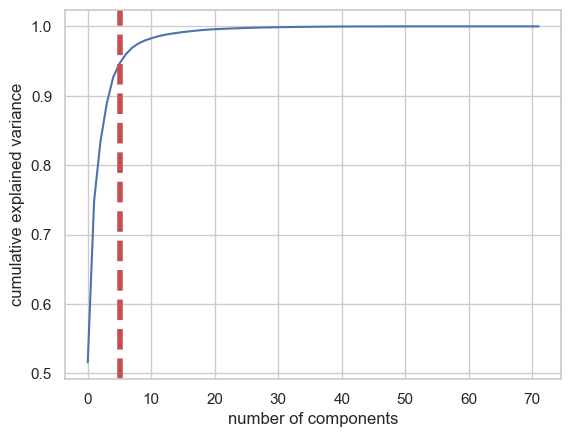

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.515842,0.515842
1,0.748328,0.232485
2,0.833942,0.085614
3,0.889071,0.055129
4,0.926497,0.037427
5,0.946488,0.019991
6,0.959929,0.013441
7,0.969311,0.009381
8,0.975523,0.006213
9,0.979727,0.004203


In [47]:
pca_test = PCA(n_components=72)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=5, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(10))

In [48]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [49]:
pca_dims = []
for x in range(0, len(pca_df)):
    pca_dims.append('PCA Component {}'.format(x))
pca_test_df = pd.DataFrame(pca_test.components_, columns=df_train.columns, index=pca_dims)
pca_test_df.head(10).T

,PCA Component 0,PCA Component 1,PCA Component 2,PCA Component 3,PCA Component 4,PCA Component 5,PCA Component 6,PCA Component 7,PCA Component 8,PCA Component 9
TUR_1x1_median,0.033979,-0.037070,0.271237,-0.051120,0.035689,0.233780,-0.024695,-0.013643,-0.014547,0.025317
SPM_1x1_median,0.027961,-0.027637,0.232286,-0.043561,0.039585,0.230477,-0.021930,-0.014042,-0.010463,0.023868
CHL_1x1_median,0.030116,-0.098740,0.319348,-0.036811,-0.111427,-0.346955,0.013756,0.029824,-0.000211,-0.029799
TUR_1x1_mean,0.033979,-0.037070,0.271237,-0.051120,0.035689,0.233780,-0.024695,-0.013643,-0.014547,0.025317
SPM_1x1_mean,0.027961,-0.027637,0.232286,-0.043561,0.039585,0.230477,-0.021930,-0.014042,-0.010463,0.023868
...,...,...,...,...,...,...,...,...,...,...
SPM_11x11_q1,0.152398,0.083401,-0.031035,-0.012963,-0.242924,0.042640,0.030905,0.171423,-0.074811,0.108268
CHL_11x11_q1,0.223954,-0.324882,-0.124806,-0.258887,0.018225,0.023536,0.310704,-0.084694,-0.383148,-0.093500
TUR_11x11_q3,0.168195,0.083481,-0.000876,-0.012117,-0.096156,0.027718,0.006450,-0.052885,0.148235,-0.123034
SPM_11x11_q3,0.138140,0.084780,-0.000494,-0.002600,-0.087970,0.019088,-0.001497,-0.044240,0.135918,-0.098122


In [50]:
res = rf_result(X_train_pca, y_train, X_test_pca, y_test)
res['Model'] = 'Random Forest'
res['Sub-Model'] = 'Fill NaN with -10 PCA df'
results_df_rf.loc[len(results_df_rf)] = res

## NN

### Helper Functions

In [51]:
def get_train_test_val_nn(input_data, train_labels, test_labels, dim = 11, oversampling = False, desired_pos_ratio =  0.5, train_val_ratio = 0.8):
    '''
    Gets train, test and validation datasets for a neural network model. 
    
    input: 
        - input_data (pd.DataFrame): 
            - dataframe of shape (m, n)
            - number of datapoints = m
            - features to consider = n-1
            - one of the columns = 'riskLevelLabel'
            
        - train_labels / test_labels (pd.DataFrame):
            - dataframe with two columns 'time' and 'site'
            - time and site pairs for train/test data
        
        - oversampling (boolean):
            - Whether oversampling should be performed

        - desired_pos_ratio (float):
            - desired ratio of positive samples when performing random oversampling

        - train_val_ratio (float):
            - ratio of training data to validation data
            
    output:
        - X_train (tensor)
        - X_test (tensor)
        - X_val (tensor)
        - y_train (np.array)
        - y_test (np.array)
        - y_val (np.array)
    '''
    train = pd.merge(train_labels, input_data, on=['time', 'site'])
    test = pd.merge(test_labels, input_data, on=['time', 'site'])
    
    # Changing window size
    i = int((dim-1)/2)
    
    def get_windowed_data(row):
        indices = np.array(range(1,122)).reshape(11,11)[5-i:6+i, 5-i:6+i].flatten()
        indices = [i-1 for i in indices]
        values = row.flatten()[[indices]].reshape(dim,dim)
        return values

    if dim != 11:
        train['CHL'] = train['CHL'].apply(get_windowed_data)
        train['TUR'] = train['TUR'].apply(get_windowed_data)
        train['SPM'] = train['SPM'].apply(get_windowed_data)
        test['CHL'] = test['CHL'].apply(get_windowed_data)
        test['TUR'] = test['TUR'].apply(get_windowed_data)
        test['SPM'] = test['SPM'].apply(get_windowed_data)
        
    # Getting X and y
    features_column_names = list(input_data.columns)
    for x in ['riskLevelLabel', 'time', 'site']:
        features_column_names.remove(x)
        
    X_train, X_test = train[features_column_names], test[features_column_names]
    y_train = train['riskLevelLabel']
    y_test = test['riskLevelLabel']
    
#     y_train = np.array([1 if x == 'increased' else 0 for x in train['riskLevelLabel']])
#     y_test = np.array([1 if x == 'increased' else 0 for x in test['riskLevelLabel']])
    
    # Oversampling for training data
    if oversampling:
        
        # Counting number of samples to oversample
        num_positives, num_negatives = sum(y_train), len(y_train)-sum(y_train)
        num_positives_to_repeat = int(desired_pos_ratio * num_negatives * 2) - num_positives
        
        # Oversampling
        ros = RandomOverSampler(sampling_strategy={1: num_positives_to_repeat}, random_state=42)
        X_train, y_train = ros.fit_resample(X_train, y_train)
        
    # Reshape and Convert to Tensor
    # X_train
    if X_train.shape[1] == 1: 
        X_train = np.array([i for i in X_train[features_column_names[0]]])
        X_train = tf.convert_to_tensor(X_train)
        X_train = tf.expand_dims(X_train, axis=3, name=None)
    else:
        X_train = np.stack([np.stack(X_train[col].values) for col in X_train.columns], axis=1)
        X_train = np.transpose(X_train, (0, 2, 3, 1))
        X_train = tf.convert_to_tensor(X_train)
        
    # X_test
    if X_test.shape[1] == 1: 
        X_test = np.array([i for i in X_test[features_column_names[0]]])
        X_test = tf.convert_to_tensor(X_test)
        X_test = tf.expand_dims(X_test, axis=3, name=None)
    else:
        X_test = np.stack([np.stack(X_test[col].values) for col in X_test.columns], axis=1)
        X_test = np.transpose(X_test, (0, 2, 3, 1))
        X_test = tf.convert_to_tensor(X_test)
        
    X_train = tf.pad(X_train, [[0, 0], [16-i,15-i], [16-i,15-i], [0,0]])
    X_test = tf.pad(X_test, [[0, 0], [16-i,15-i], [16-i,15-i], [0,0]])
    
    # Train Validation Split
    i = int(X_train.shape[0] * train_val_ratio)
    X_val, y_val = X_train[i:], y_train[i:]
    X_train, y_train = X_train[:i], y_train[:i]
    
    return {'X_train': X_train, 
            'X_test': X_test, 
            'X_val': X_val, 
            'y_train': y_train, 
            'y_test': y_test,
            'y_val': y_val}    

In [52]:
def f1(y_true, y_pred):
    '''
    f1 score function for Keras
    '''
    
    def recall_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Positives = K.sum(K.round(K.clip(y_true, 0, 1)))

        recall = TP / (Positives+K.epsilon())
        return recall


    def precision_m(y_true, y_pred):
        TP = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        Pred_Positives = K.sum(K.round(K.clip(y_pred, 0, 1)))

        precision = TP / (Pred_Positives+K.epsilon())
        return precision

    precision, recall = precision_m(y_true, y_pred), recall_m(y_true, y_pred)

    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [53]:
def fit_nn(xy_data, model_type, metrics=['acc','AUC','Precision','Recall', f1], 
           loss='binary_crossentropy', optimizer='adam',
          batch_size=64, epochs=40):
    '''
    Fits a neural network model and returns history & evaluation metrics on test data.
    
    input:
        - xy_data: dictionary with X_train, X_test, X_val, y_train, y_test, y_val in this order (dict)
        - model_type: "baseline"/"convolution" (string)
        - loss: "binary_crossentropy" (string)
        - metrics: list of metrics to track. available metrics are: (list of string/function)
            - "acc"
            - "AUC"
            - "Precision"
            - "Recall"
            - f1
    '''
    # unpacking data
    X_train, X_test, X_val, y_train, y_test, y_val = xy_data.values()
    
    # building model
    model = models.Sequential()
    
    if model_type == "baseline":
        model.add(layers.Flatten(input_shape=X_train.shape[1:]))
        model.add(layers.Dense(100, activation='relu'))
        model.add(layers.Dense(1, activation="sigmoid"))
        
    elif model_type == "convolution":
        model.add(layers.Conv2D(filters=6, kernel_size=5, activation='relu', padding='same', input_shape=X_train.shape[1:]))
        model.add(layers.AveragePooling2D(pool_size=2, strides=2))
        model.add(layers.Conv2D(filters=16, kernel_size=5, activation='relu'))
        model.add(layers.AveragePooling2D(pool_size=2, strides=2))
        model.add(layers.Flatten())
        model.add(layers.Dense(120, activation='relu')),
        model.add(layers.Dense(84, activation='relu')),
        model.add(layers.Dense(10, activation='relu')),
        model.add(layers.Dense(1, activation='sigmoid'))

    else:
        print('Model Type Undefined')
        
    model.compile(optimizer=optimizer, loss=loss, metrics=metrics)
    
    # Fit Model
    history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val), verbose=0)
    
    # Evaluate Model
    result = model.evaluate(X_test, y_test)
    
    return model, history, result

In [54]:
def plot_train_val_loss(his, graph_title, ax):
    '''
    input:
        - history (keras.callbacks.History)
        - graph_title (string)
        - ax: plot location (tuple)
    output: 1 graph of train and validation loss across epochs
    '''
    axs[ax[0], ax[1]].plot(his.history['loss'])
    axs[ax[0], ax[1]].plot(his.history['val_loss'])
    axs[ax[0], ax[1]].title.set_text(f'{graph_title}')
    axs[ax[0], ax[1]].legend(['Training', 'Validation'])

def plot_train_val_metric(his, graph_title, ax, metric):
    '''
    input:
        - history (keras.callbacks.History)
        - graph_title (string)
        - ax: plot location (tuple)
        - metric: metric of interest (string)
    output: 1 graph of train and validation metric across epochs
    '''
    axs[ax[0], ax[1]].plot(his.history[f'{metric}'])
    axs[ax[0], ax[1]].plot(his.history[f'val_{metric}'])
    axs[ax[0], ax[1]].title.set_text(f'{graph_title}')
    axs[ax[0], ax[1]].legend(['Training', 'Validation'])

### Get results for models

In [55]:
histories = []
results = []
print(datetime.now())

2023-05-13 18:35:43.307123


In [56]:
y_test.shape

(3552,)

In [57]:
%%time
import itertools
from IPython.display import clear_output

model_types = ["baseline", "convolution"]
num_features = [1,3]
oversampling_ = [True, False]
i = 0

for model_type, num_feature, oversampling__ in itertools.product(model_types, num_features, oversampling_):
    
    # Getting Input Data
    if num_feature == 1:
        input_data_ = input_data[['CHL', 'riskLevelLabel', 'site', 'time']]
        
    elif num_feature == 3:
        input_data_ = input_data[['CHL', 'SPM', 'TUR', 'riskLevelLabel', 'site', 'time']]
        
    
    # Getting xy_data
    xy_data = get_train_test_val_nn(input_data_, 
                           time_site_pairs_train, 
                           time_site_pairs_test, 
                           oversampling = oversampling_)
    
    # Get history and result
    _, history, result = fit_nn(xy_data, model_type)
    histories.append(history)
    results.append(result)
    
    i += 1
    clear_output(wait=True)
    print(f'Progress: {i}/{len(model_types)*len(num_features)*len(oversampling_)}')
    print(datetime.now())

Progress: 8/8
2023-05-13 18:45:05.754740
CPU times: user 39min 10s, sys: 4min 7s, total: 43min 17s
Wall time: 9min 22s


In [58]:
model_names = []

for model_type, num_feature, oversampling__ in itertools.product(model_types, num_features, oversampling_):
    oversample = "Oversampling" if oversampling__ else "No Oversampling"
    model_names.append(f'{model_type.capitalize()}, {num_feature} feature, {oversample}')
    
df1 = pd.DataFrame(model_names, columns=['Sub-Model'])
df2 = pd.DataFrame(results, columns=['loss', 'acc','AUC','Precision','Recall', 'f1'])
results_df_nn = pd.concat([df1, df2], axis=1)
results_df_nn['Model'] = ['Neural Network']*8
results_df_nn

,Sub-Model,loss,acc,AUC,Precision,Recall,f1,Model
0,"Baseline, 1 feature, Oversampling",0.248086,0.921734,0.805872,0.147766,0.589041,0.148420,Neural Network
1,"Baseline, 1 feature, No Oversampling",0.228624,0.922297,0.804488,0.155932,0.630137,0.168826,Neural Network
2,"Baseline, 3 feature, Oversampling",0.247089,0.926802,0.794550,0.144487,0.520548,0.156757,Neural Network
3,"Baseline, 3 feature, No Oversampling",0.243839,0.917793,0.803010,0.138614,0.575342,0.161585,Neural Network
4,"Convolution, 1 feature, Oversampling",0.259813,0.938626,0.779505,0.188841,0.602740,0.176412,Neural Network
5,"Convolution, 1 feature, No Oversampling",0.270212,0.927083,0.792595,0.152985,0.561644,0.157143,Neural Network
6,"Convolution, 3 feature, Oversampling",0.252744,0.930462,0.778040,0.152000,0.520548,0.145674,Neural Network
7,"Convolution, 3 feature, No Oversampling",0.239260,0.922860,0.785220,0.144876,0.561644,0.152760,Neural Network


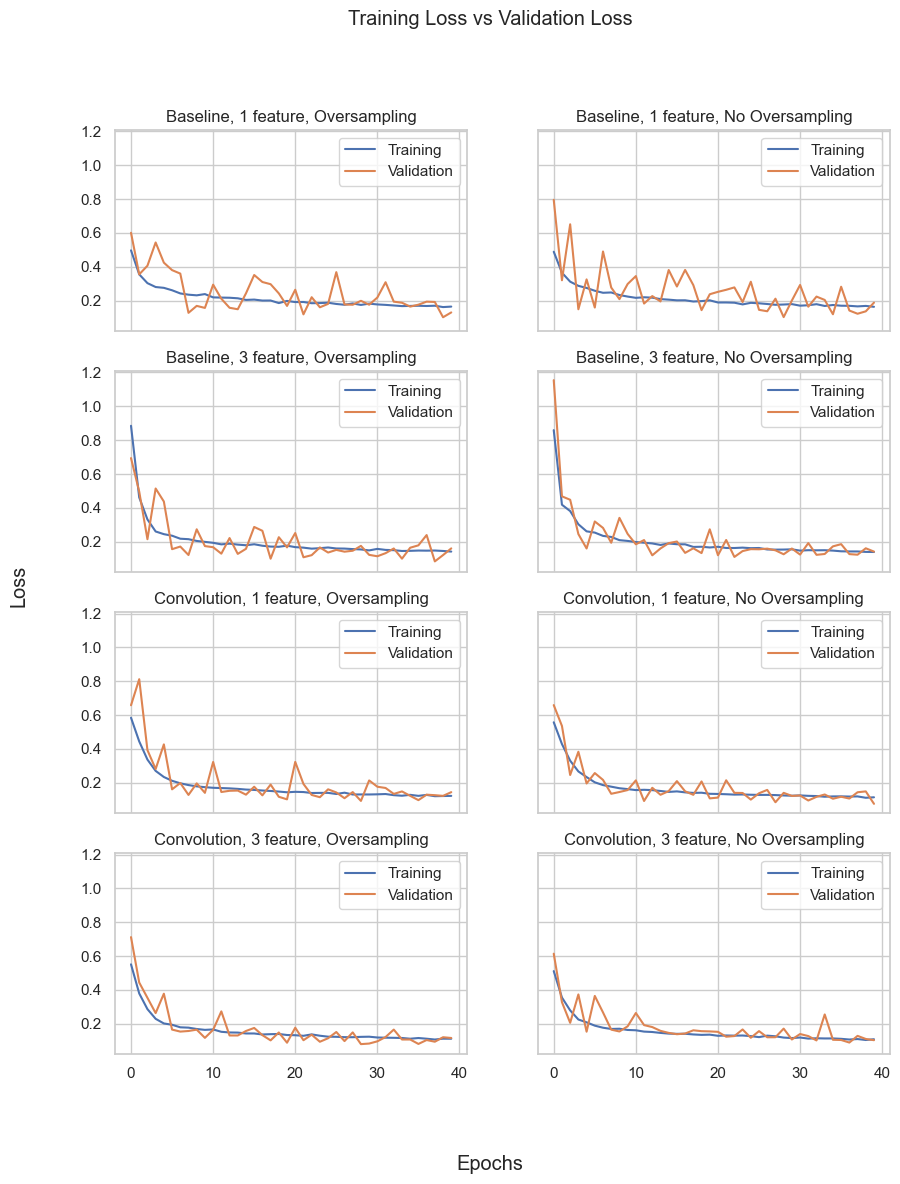

In [59]:
model_names_string = model_names

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

for j in range(8):
    ax = ([(k,i) for k in range(4) for i in range(2)])[j]
    plot_train_val_loss(histories[j], model_names_string[j], ax)

plt.suptitle('Training Loss vs Validation Loss')
fig.supxlabel("Epochs")
fig.supylabel("Loss")
plt.show()

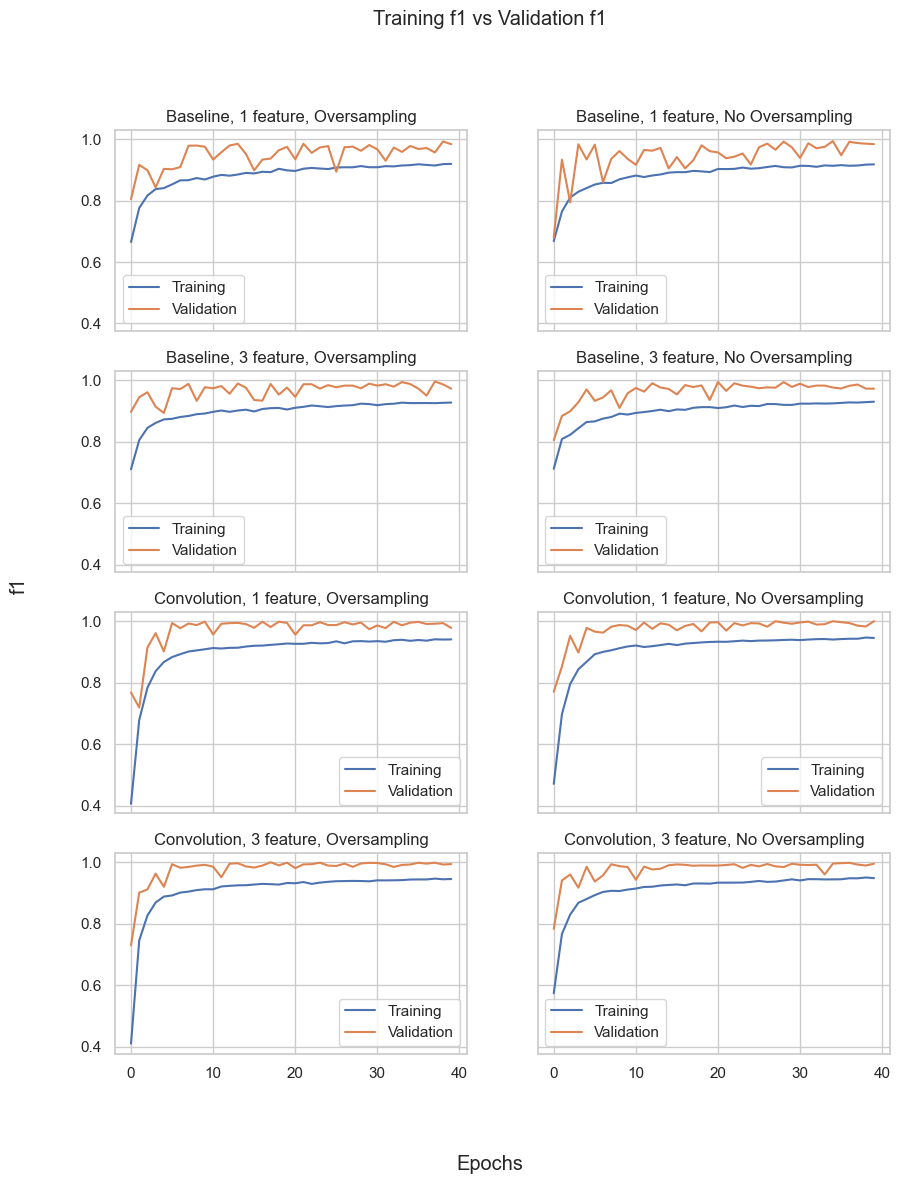

In [60]:
metric='f1'

fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10, 12), sharex=True, sharey=True)

for j in range(8):
    ax = ([(k,i) for k in range(4) for i in range(2)])[j]
    plot_train_val_metric(histories[j], model_names_string[j], ax, metric=metric)

plt.suptitle(f'Training {metric} vs Validation {metric}')
fig.supxlabel("Epochs")
fig.supylabel(f"{metric}")
plt.show()

# Final Results

In [61]:
results_df_nn_final = results_df_nn[['Model', 'Sub-Model', 'AUC','Precision','Recall','f1','acc']]
results_df_rf_final = results_df_rf[['Model', 'Sub-Model', 'AUC','Precision','Recall','f1','acc']]
pd.concat([results_df_baseline, results_df_nn_final, results_df_rf_final]).set_index(['Model', 'Sub-Model'])

AUC  Precision   
Model          Sub-Model                                                      
Baseline       Baseline                                 0.507921   0.040000  \
Neural Network Baseline, 1 feature, Oversampling        0.805872   0.147766   
               Baseline, 1 feature, No Oversampling     0.804488   0.155932   
               Baseline, 3 feature, Oversampling        0.794550   0.144487   
               Baseline, 3 feature, No Oversampling     0.803010   0.138614   
               Convolution, 1 feature, Oversampling     0.779505   0.188841   
               Convolution, 1 feature, No Oversampling  0.792595   0.152985   
               Convolution, 3 feature, Oversampling     0.778040   0.152000   
               Convolution, 3 feature, No Oversampling  0.785220   0.144876   
Random Forest  Fill NaN with mean df                    0.760327   0.400000   
               Fill NaN with mean PCA df                0.685882   0.625000   
               Fill NaN with -10 df                     0.754728   0.333333   
               Fill NaN with -10 PCA df                 0.685955   0.625000   

                                                          Recall        f1   
Model          Sub-Model                                                     
Baseline       Baseline                                 0.036585  0.038217  \
Neural Network Baseline, 1 feature, Oversampling        0.589041  0.148420   
               Baseline, 1 feature, No Oversampling     0.630137  0.168826   
               Baseline, 3 feature, Oversampling        0.520548  0.156757   
               Baseline, 3 feature, No Oversampling     0.575342  0.161585   
               Convolution, 1 feature, Oversampling     0.602740  0.176412   
               Convolution, 1 feature, No Oversampling  0.561644  0.157143   
               Convolution, 3 feature, Oversampling     0.520548  0.145674   
               Convolution, 3 feature, No Oversampling  0.561644  0.152760   
Random Forest  Fill NaN with mean df                    0.082192  0.136364   
               Fill NaN with mean PCA df                0.068493  0.123457   
               Fill NaN with -10 df                     0.041096  0.073171   
               Fill NaN with -10 PCA df                 0.068493  0.123457   

                                                             acc  
Model          Sub-Model                                          
Baseline       Baseline                                 0.957501  
Neural Network Baseline, 1 feature, Oversampling        0.921734  
               Baseline, 1 feature, No Oversampling     0.922297  
               Baseline, 3 feature, Oversampling        0.926802  
               Baseline, 3 feature, No Oversampling     0.917793  
               Convolution, 1 feature, Oversampling     0.938626  
               Convolution, 1 feature, No Oversampling  0.927083  
               Convolution, 3 feature, Oversampling     0.930462  
               Convolution, 3 feature, No Oversampling  0.922860  
Random Forest  Fill NaN with mean df                    0.978604  
               Fill NaN with mean PCA df                0.980011  
               Fill NaN with -10 df                     0.978604  
               Fill NaN with -10 PCA df                 0.980011

# Window Size Comparison

## NN

In [79]:
histories = []
results = []

In [80]:
%%time


# Getting Input Data
input_data_ = input_data[['CHL', 'SPM', 'TUR', 'riskLevelLabel', 'site', 'time']]

j = 0
for dim in [1,3,5,7,9,11]:
    
    # Getting xy_data
    xy_data = get_train_test_val_nn(input_data_, 
                           time_site_pairs_train, 
                           time_site_pairs_test, 
                           dim=dim)
    
    # Get history and result
    _, history, result = fit_nn(xy_data, "convolution")
    histories.append(history)
    results.append(result)
    
    j += 1
    clear_output(wait=True)
    print(f'Progress: {j}/6')
    print(datetime.now())

Progress: 6/6
2023-05-13 21:39:03.598016
CPU times: user 33min 20s, sys: 3min 15s, total: 36min 35s
Wall time: 7min 14s


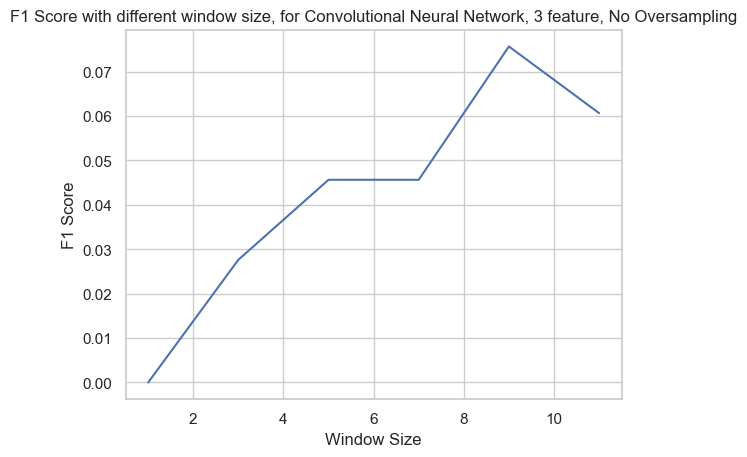

In [83]:
f1_scores = [i[5] for i in results]
plt.plot([1,3,5,7,9,11], f1_scores)
plt.ylabel('F1 Score')
plt.xlabel('Window Size')
plt.title('F1 Score with different window size, for Convolutional Neural Network, 3 feature, No Oversampling')
plt.show()

# Accuracy Comparison

## NN

In [69]:
%%time
# convolution, 3 features, no oversampling

# Getting Input Data
input_data_ = input_data[['CHL', 'SPM', 'TUR', 'riskLevelLabel', 'site', 'time']]


# Getting xy_data
xy_data = get_train_test_val_nn(input_data_, 
                       time_site_pairs_train, 
                       time_site_pairs_test)

# Get history and result
model, history, result = fit_nn(xy_data, "convolution")

111/111 [==============================] - 0s 4ms/step - loss: 0.1274 - acc: 0.9764 - auc: 0.7467 - precision: 0.3333 - recall: 0.1507 - f1: 0.0682     
CPU times: user 5min 29s, sys: 35.9 s, total: 6min 5s
Wall time: 1min 19s


In [70]:
test = pd.merge(time_site_pairs_test, input_data_, on=['time', 'site'])
test

,time,site,CHL,SPM,TUR,riskLevelLabel
0,2022-05-28,Tankerton,"[[3.0681593, 3.5743475, 3.4223847, 2.6863327, ...","[[11.396874, 10.712557, 11.512654, 13.30401, 1...","[[17.126097, 16.10142, 17.312565, 19.697056, 2...",0
1,2022-06-21,Porthluney,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",0
2,2022-04-28,Margate The Bay,"[[5.9519715, 6.0531535, 5.8391333, 5.837465, 5...","[[55.78747, 78.68763, 151.65263, 95.151245, 48...","[[74.41723, 98.13491, 185.88701, 116.659035, 6...",0
3,2022-08-27,Scarborough North Bay,"[[-10.0, -10.0, -10.0, -10.0, -10.0, 5.675852,...","[[-10.0, -10.0, -10.0, -10.0, -10.0, 5.6276155...","[[-10.0, -10.0, -10.0, -10.0, -10.0, 9.191703,...",0
4,2022-09-29,Fleetwood,"[[7.546816, 6.3228583, 7.967764, 7.5269394, 7....","[[44.756203, 42.051796, 41.093098, 41.710003, ...","[[64.627426, 61.50526, 60.310486, 61.210335, 6...",0
...,...,...,...,...,...,...
3547,2022-09-28,Bournemouth Alum Chine,"[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...","[[-10.0, -10.0, -10.0, -10.0, -10.0, -10.0, -1...",0
3548,2022-08-25,Amble Links,"[[14.044253, 11.30548, 7.0173755, 6.124067, 6....","[[1.135423, 1.1562469, 1.4745402, 2.6224568, 1...","[[1.9377135, 1.9745814, 2.481386, 4.3793697, 3...",0
3549,2022-09-26,Crackington Haven,"[[2.8387282, 1.5647323, 1.7921935, 2.7360969, ...","[[1.2430248, 0.26631358, 0.2535564, 0.44967893...","[[2.117206, 0.46037468, 0.4384203, 0.77533394,...",0
3550,2022-07-03,Slapton Sands Torcross,"[[-10.0, -10.0, -10.0, 4.080953, 4.9747424, -1...","[[-10.0, -10.0, -10.0, 3.853604, 4.5502663, -1...","[[-10.0, -10.0, -10.0, 6.468442, 7.6344047, -1...",0


In [71]:
y_test_preds = model.predict(xy_data['X_test'])
test['preds'] = [1 if x >= 0.5 else 0 for x in y_test_preds]

111/111 [==============================] - 0s 2ms/step


In [72]:
test['time'] = pd.to_datetime(test['time'])

In [73]:
test.groupby(pd.Grouper(key='time', freq='M')).apply(lambda x: f1_score(x['riskLevelLabel'], x['preds']))

/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1609: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, "true nor predicted", "F-score is", len(true_sum))


time
2022-04-30    0.000000
2022-05-31    0.222222
2022-06-30    0.000000
2022-07-31    0.000000
2022-08-31    0.000000
2022-09-30    0.263158
Freq: M, dtype: float64